In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('tour_package.csv')
df.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [ ]:
df.shape

(4888, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()/len(df)*100

,0
CustomerID,0.000000
ProdTaken,0.000000
Age,4.623568
TypeofContact,0.511457
CityTier,0.000000
DurationOfPitch,5.135025
Occupation,0.000000
Gender,0.000000
NumberOfPersonVisiting,0.000000
NumberOfFollowups,0.920622


In [ ]:
df.dtypes

,0
CustomerID,int64
ProdTaken,int64
Age,float64
TypeofContact,object
CityTier,int64
DurationOfPitch,float64
Occupation,object
Gender,object
NumberOfPersonVisiting,int64
NumberOfFollowups,float64


In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
cat_col = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

for col in cat_col:
  print(col)
  print('-------------')
  print(df[col].value_counts())
  print()

TypeofContact
-------------
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

Occupation
-------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

Gender
-------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

ProductPitched
-------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

MaritalStatus
-------------
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

Designation
-------------
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64



In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
num_cat = ['CityTier','Passport','ProdTaken','NumberOfPersonVisiting','NumberOfFollowups',
      'NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting']

for col in num_cat:
  print(col)
  print('-------------')
  print(df[col].value_counts())
  print()

CityTier
-------------
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

Passport
-------------
Passport
0    3466
1    1422
Name: count, dtype: int64

ProdTaken
-------------
ProdTaken
0    3968
1     920
Name: count, dtype: int64

NumberOfPersonVisiting
-------------
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64

NumberOfFollowups
-------------
NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

NumberOfTrips
-------------
NumberOfTrips
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64

PitchSatisfactionScore
-------------
PitchSatisfactionScore
3    1478
5     970
1     942
4     912
2     586
Name: count, dtype: int64

NumberOfChildrenVisiting
-------------
NumberOfChildrenVisiting
1.0    2080
2.0    1335
0.0    1082
3.0

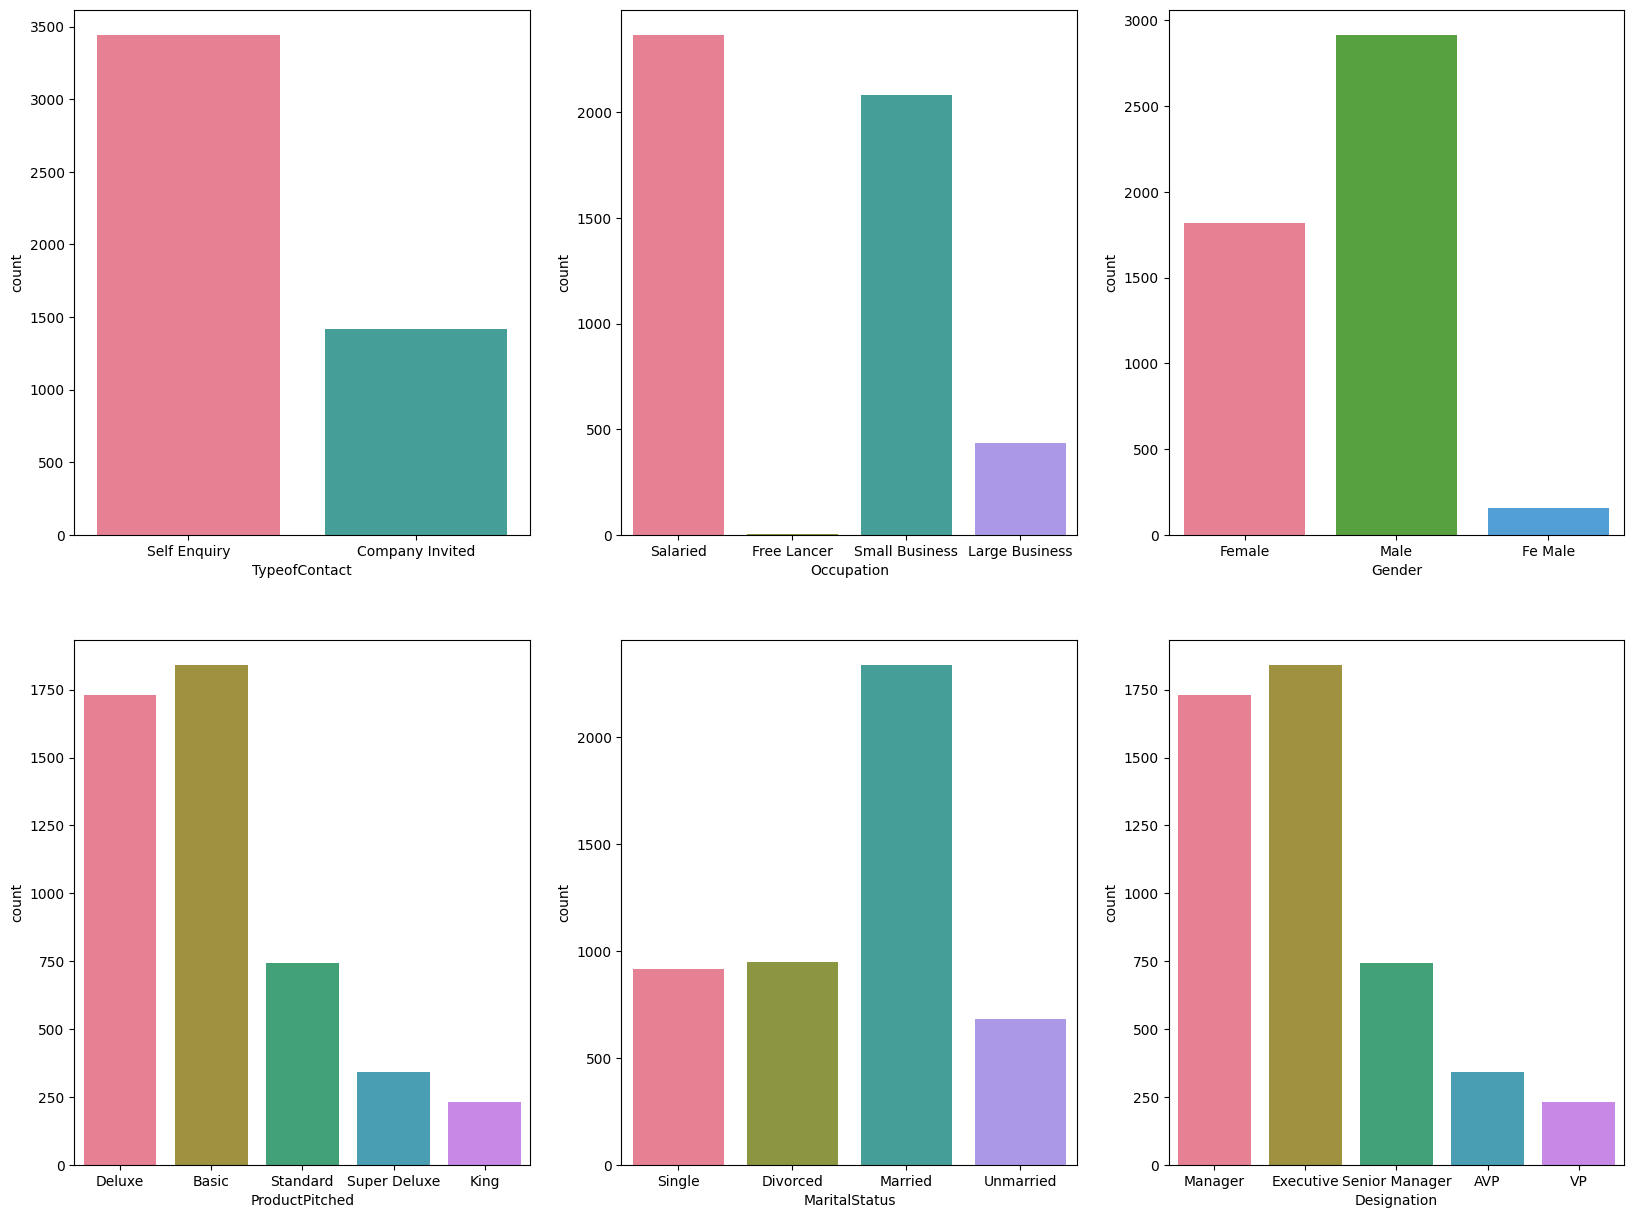

In [ ]:
plt.figure(figsize=(20,15))
for i, col in enumerate(cat_col):
  plt.subplot(2,3,i+1)
  sns.countplot(x=col,data=df,palette='husl')

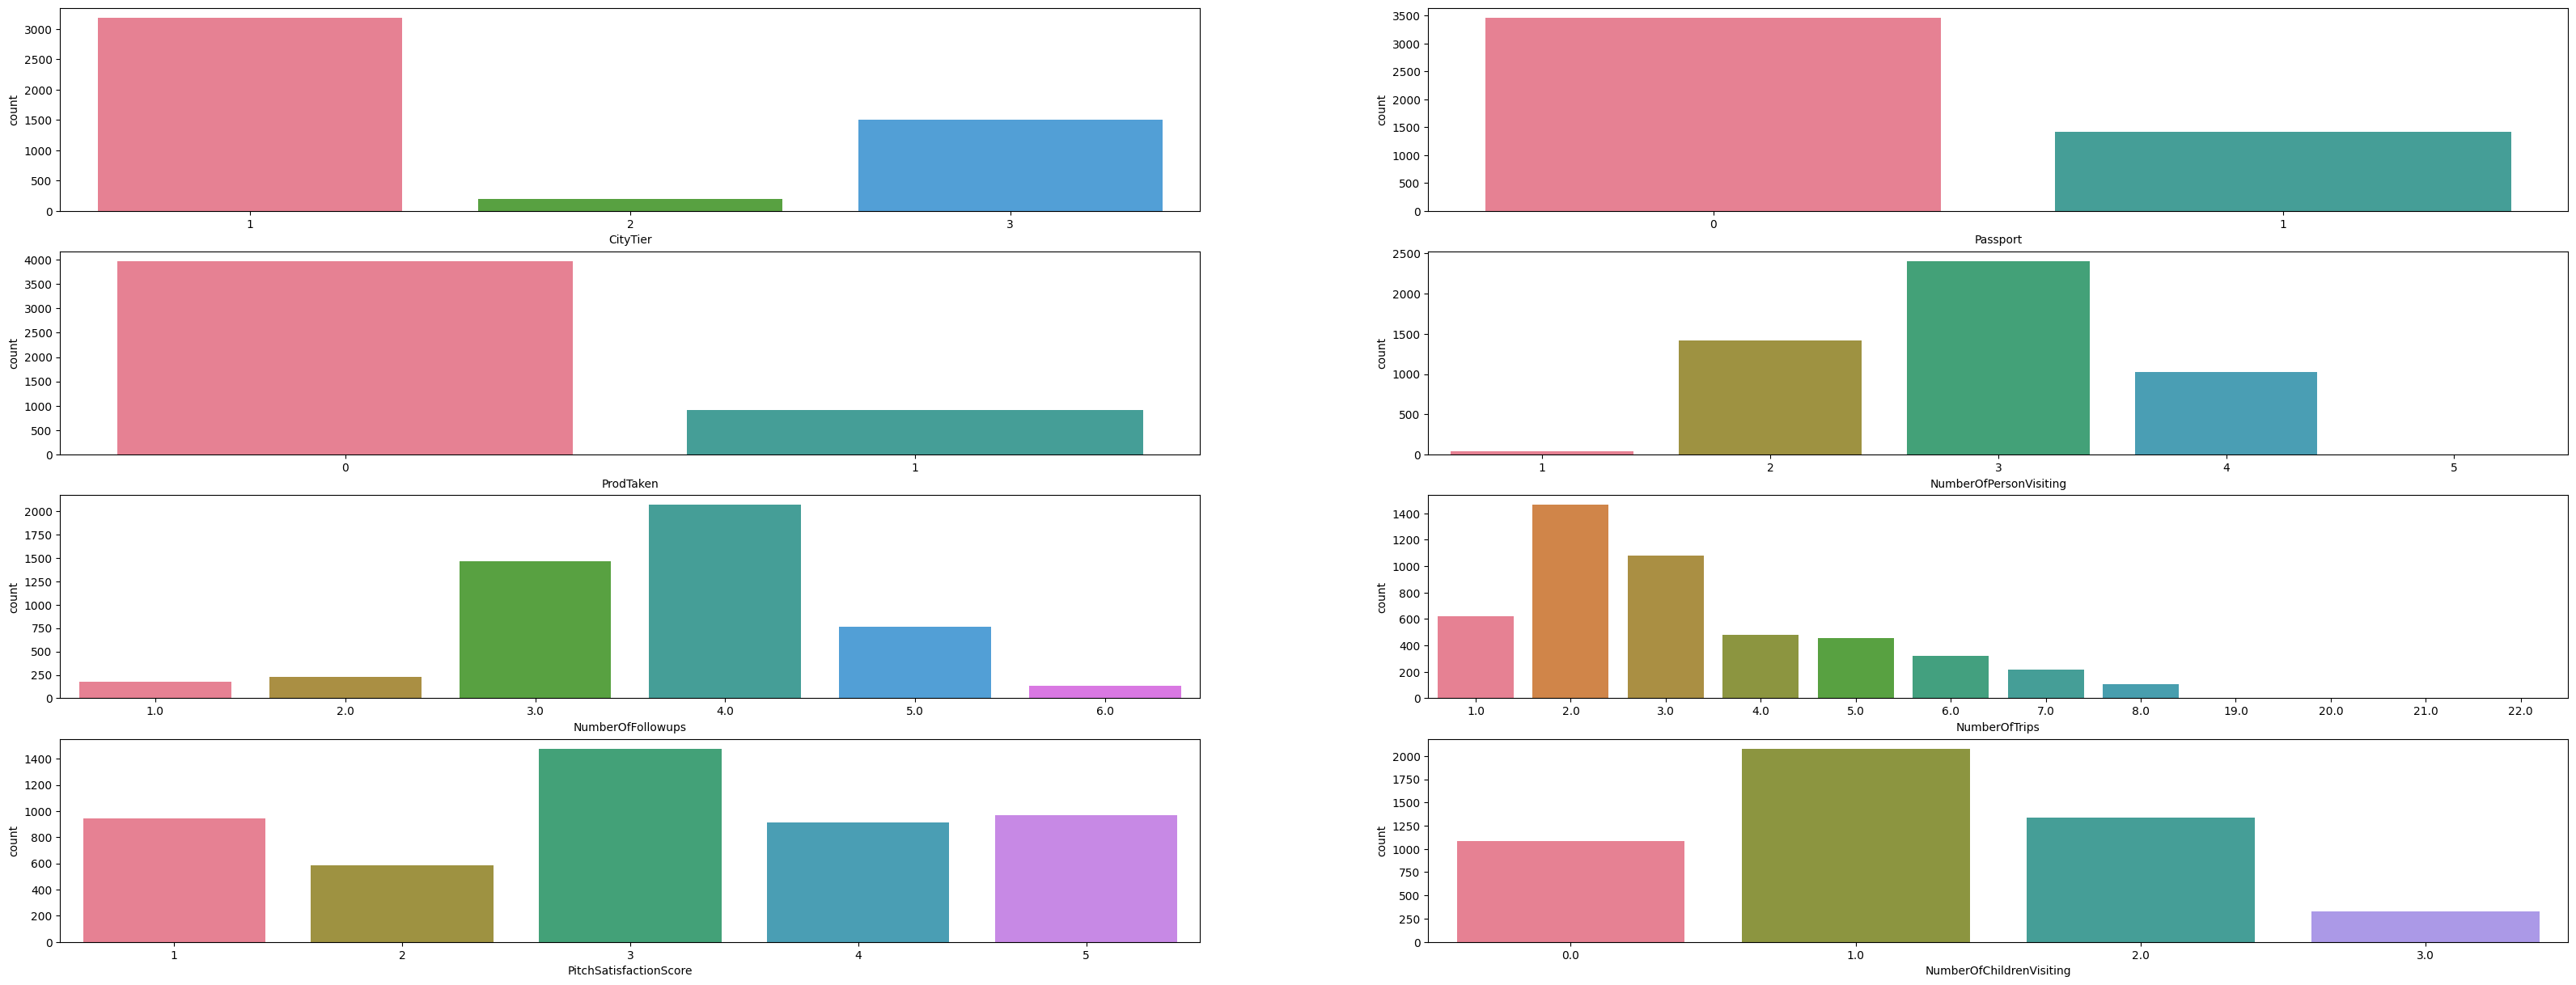

In [ ]:
plt.figure(figsize=(40,15))
for i, col in enumerate(num_cat):
  plt.subplot(4,2,i+1)
  sns.countplot(x=col,data=df,palette='husl')

# Bi-variate Analysis

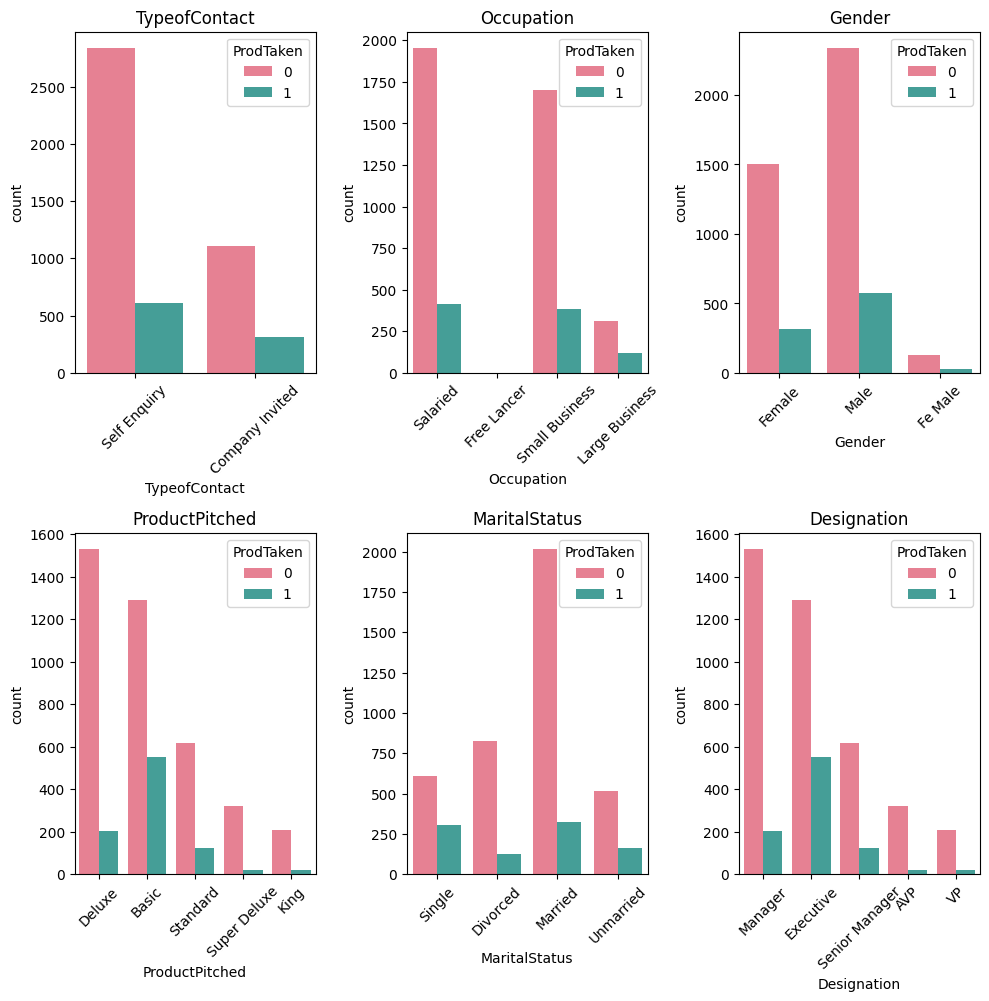

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cat_col):
  plt.subplot(2,3,i+1)
  plt.title(col)
  sns.countplot(x=col,data=df,palette='husl',hue='ProdTaken')
  plt.tight_layout()
  plt.xticks(rotation=45)


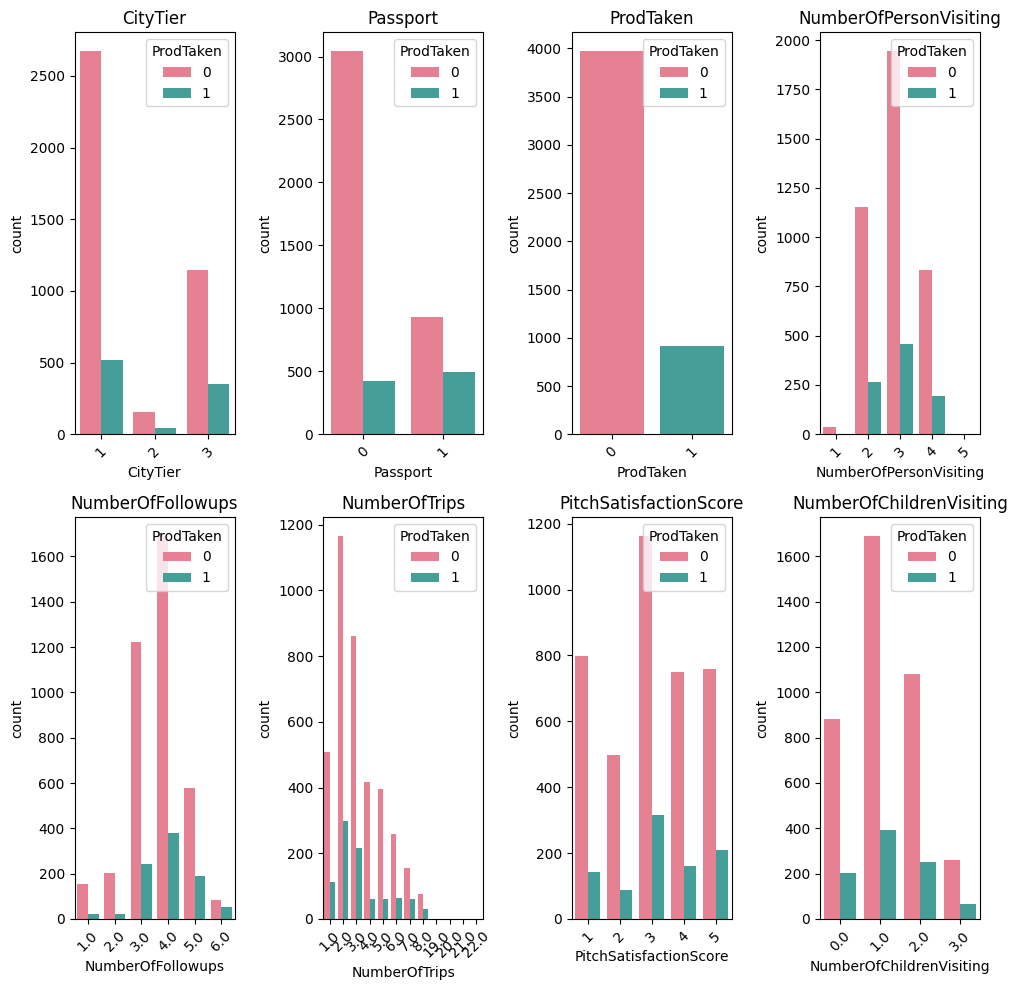

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(num_cat):
  plt.subplot(2,4,i+1)
  plt.title(col)
  sns.countplot(x=col,data=df,palette='husl',hue='ProdTaken')
  plt.tight_layout()
  plt.xticks(rotation=45)


In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

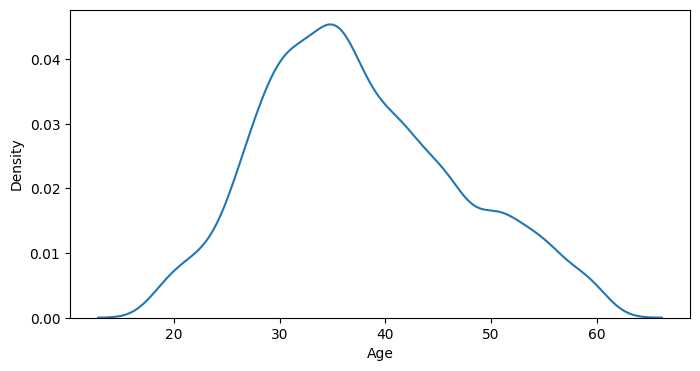

In [ ]:
num_col = ['Age','MonthlyIncome']

# displot
plt.figure(figsize=(8,4))
sns.kdeplot(x='Age',data=df)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

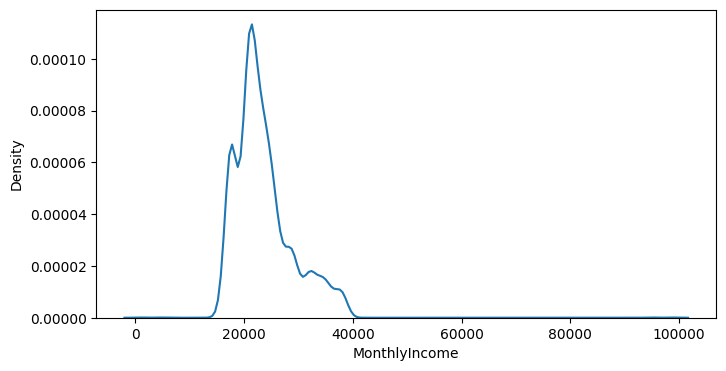

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(x='MonthlyIncome',data=df)

In [ ]:
df['Gender'].replace({'Fe Male':'Female'},inplace=True)

In [ ]:
df['MaritalStatus'].replace({'Unmarried':'Single'}, inplace=True)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
num_cat.extend(['Age','MonthlyIncome'])

In [ ]:
num_cat

['CityTier',
 'Passport',
 'ProdTaken',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'Age',
 'MonthlyIncome']

<Axes: >

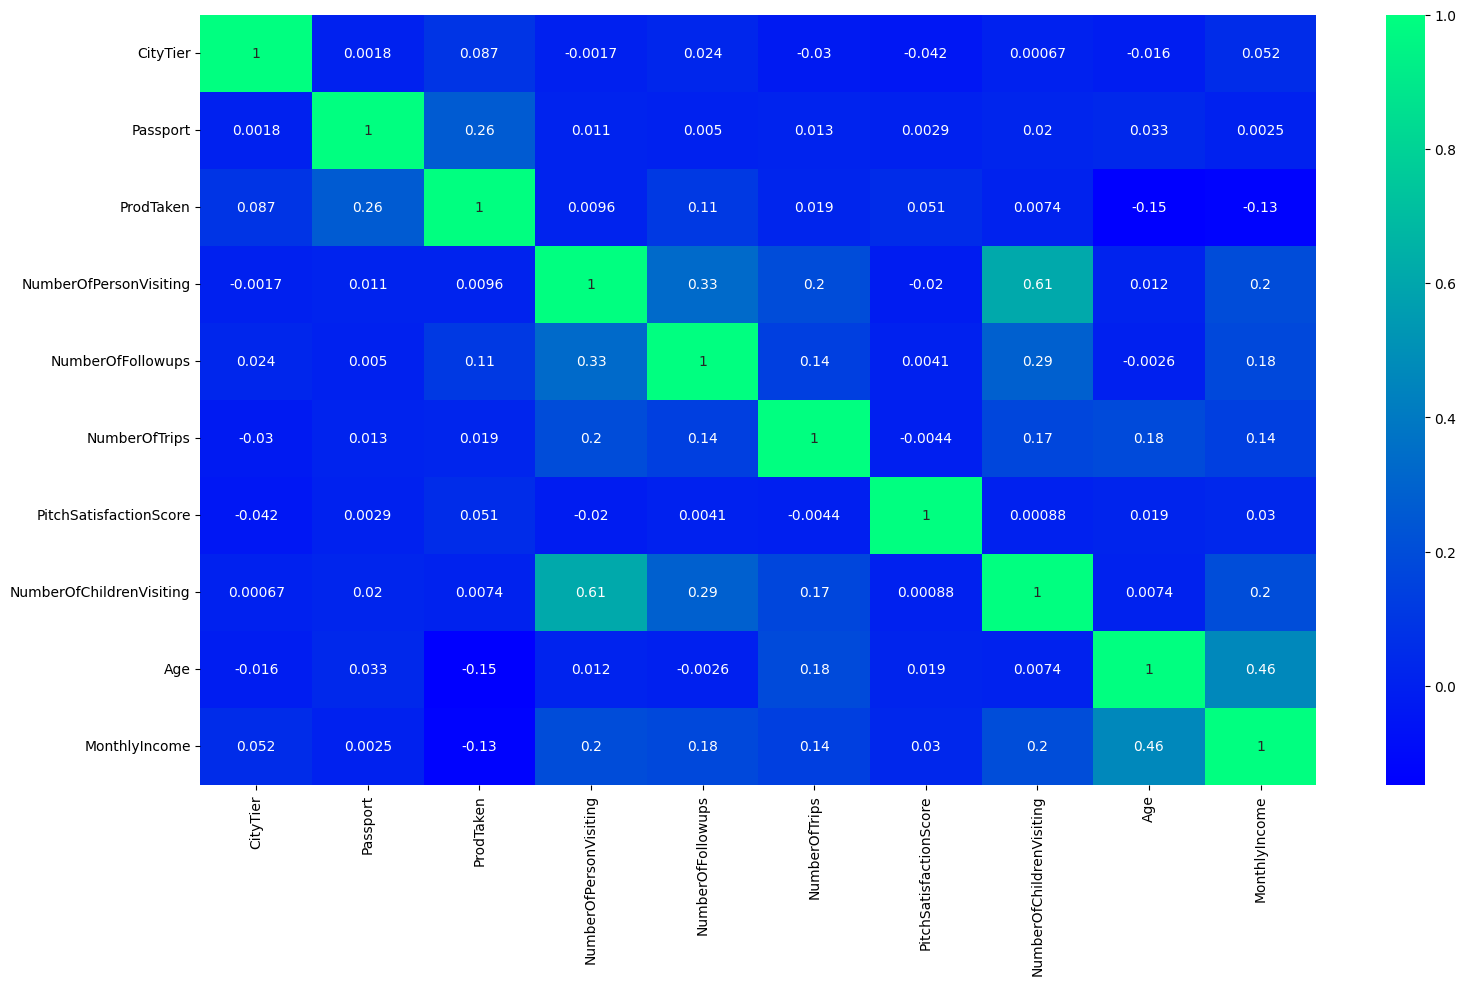

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df[num_cat].corr(),cmap='winter',annot=True)

In [ ]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [ ]:
new_df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.shape


(4888, 19)

In [ ]:
new_df.shape

(4888, 28)

In [ ]:
df['Occupation'].unique()


array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [ ]:

new_df.isnull().sum()

,0
ProdTaken,0
Age,226
CityTier,0
DurationOfPitch,251
NumberOfPersonVisiting,0
NumberOfFollowups,45
PreferredPropertyStar,26
NumberOfTrips,140
Passport,0
PitchSatisfactionScore,0


In [ ]:
from sklearn.impute import KNNImputer
new_df = pd.DataFrame(KNNImputer().fit_transform(new_df), columns=new_df.columns)

In [ ]:
new_df.isnull().sum()

,0
ProdTaken,0
Age,0
CityTier,0
DurationOfPitch,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
PreferredPropertyStar,0
NumberOfTrips,0
Passport,0
PitchSatisfactionScore,0


In [ ]:
# X and Y split
x = new_df.drop('ProdTaken',axis=1)
y = new_df['ProdTaken']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3666, 27)
(3666,)


In [ ]:
#Importiing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Initializing the ANN
ann_clf=Sequential()


In [ ]:
#adding the input layer and first hidden layer
ann_clf.add(Dense(activation='relu',input_dim=27,units=6,kernel_initializer='uniform'))

In [ ]:
##Adding the second hidden layer
ann_clf.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

In [ ]:
#adding the outputlayer
ann_clf.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [ ]:
#compiling the ann
ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##Fiting the ann to the training set
ann_clf.fit(X_train,y_train,validation_split=0.33,batch_size=32,epochs=50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7657 - loss: 0.6864 - val_accuracy: 0.8240 - val_loss: 0.6545
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.6305 - val_accuracy: 0.8240 - val_loss: 0.5126
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4762 - val_accuracy: 0.8240 - val_loss: 0.4114
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4289 - val_accuracy: 0.8240 - val_loss: 0.3951
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.4029 - val_accuracy: 0.8240 - val_loss: 0.3881
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.3922 - val_accuracy: 0.8240 - val_loss: 0.3847
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.3871 - val_accuracy: 0.8240 - val_loss: 0.3812
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.3805 - val_accuracy: 0.8240 - val_loss:

In [ ]:
# Predicting the Test set results
y_pred = ann_clf.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,y_pred)
acc

0.855973813420622

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[960,  39],
       [137,  86]])